<a href="https://colab.research.google.com/github/SeferKul/QuickDataVisualization/blob/main/HV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**A Quick Practice with  "Total Medal Numbers" and "Human Development Index**.


---






**Importing libraries**

In [85]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

**Reading excel files**

In [76]:
altindf = pd.read_excel("altin.xlsx") 
gumusdf = pd.read_excel("gumus.xlsx") 
bronzdf = pd.read_excel("bronz.xlsx") 
insandf = pd.read_excel("insani_gelisim_indeksi.xlsx") 


**Seperating from "NOC" column**

In [46]:
newaltindf=altindf.loc[:,["Country","Total"]]
newgumusdf=gumusdf.loc[:,["Country","Total"]]
newbronzdf=bronzdf.loc[:,["Country","Total"]]
newgumusdf

,Country,Total
0,United States,1195.0
1,Soviet Union,627.0
2,United Kingdom,591.0
3,France,461.0
4,Germany,350.0
...,...,...
131,Senegal,1.0
132,Sudan,1.0
133,Tonga,1.0
134,Burundi,NaN


**Merging madals dataframe according to *outer*. Because we are looking for at least one categorical madal.**

In [57]:
mergeAltGumdf=newaltindf.merge(newgumusdf,how="outer",on="Country",suffixes=("_Altin","_Gumus"))
mergeAlldf=mergeAltGumdf.merge(newbronzdf,how="outer",on= "Country")
mergeAlldf

,Country,Total_Altin,Total_Gumus,Total
0,United States,2088.0,1195.0,1052.0
1,Soviet Union,838.0,627.0,584.0
2,United Kingdom,498.0,591.0,505.0
3,France,378.0,461.0,475.0
4,Germany,407.0,350.0,454.0
...,...,...,...,...
131,Senegal,NaN,1.0,NaN
132,Sudan,NaN,1.0,NaN
133,Tonga,NaN,1.0,NaN
134,Burundi,1.0,NaN,NaN


**Renaming columns according to the instructions.**

In [69]:
df_madalya=mergeAlldf.rename({"Country":"Ulke","Total_Altin":"Altin","Total_Gumus":"Gumus","Total":"Bronz"},axis="columns")
df_madalya.columns

Index(['Ulke', 'Altin', 'Gumus', 'Bronz'], dtype='object')

**Replacing "None" values with "0" by using np.nan and df.replace\**

In [70]:
df_madalya.replace(np.nan,0,inplace=True)

**Calculating all categorical medals and creating a new columns to contain calculated values.**

In [72]:
df_madalya["Toplam"]=df_madalya["Altin"]+df_madalya["Gumus"]+df_madalya["Bronz"]

**Renaming insandf columns and merging them with df_ulkeler. Some values are lost because the country names don't match each other.**

In [84]:
insandf=insandf.rename(columns={"Country":"Ulke","2008_Human Development Index":"2008_Insani gelisim indeksi"})
df_ulkeler=df_madalya.merge(insandf,how="inner",on="Ulke")
df_ulkeler

,Ulke,Altin,Gumus,Bronz,Toplam,2008_Insani gelisim indeksi
0,United States,2088.0,1195.0,1052.0,4335.0,0.911
1,United Kingdom,498.0,591.0,505.0,1594.0,0.903
2,France,378.0,461.0,475.0,1314.0,0.875
3,Germany,407.0,350.0,454.0,1211.0,0.924
4,Australia,293.0,369.0,413.0,1075.0,0.926
...,...,...,...,...,...,...
111,Senegal,0.0,1.0,0.0,1.0,0.457
112,Sudan,0.0,1.0,0.0,1.0,0.461
113,Tonga,0.0,1.0,0.0,1.0,0.688
114,Burundi,1.0,0.0,0.0,1.0,0.384




*   **Set a figure size for better review.**
*   **According to the scatter plot, we can assume there is a correlation between total medals and the human development index.**



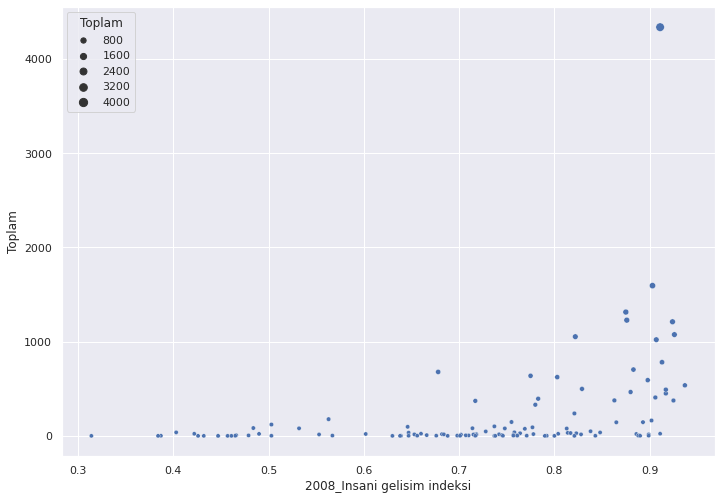

In [95]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.scatterplot(data=df_ulkeler, 
                x="2008_Insani gelisim indeksi",
                y="Toplam",
                size="Toplam"
                )

**Filter countries according to Human Development Index.**

In [112]:
df_filtered=df_ulkeler.loc[(df_ulkeler["2008_Insani gelisim indeksi"]>=0.9)]
df_filtered

,Ulke,Altin,Gumus,Bronz,Toplam,2008_Insani gelisim indeksi
0,United States,2088.0,1195.0,1052.0,4335.0,0.911
1,United Kingdom,498.0,591.0,505.0,1594.0,0.903
3,Germany,407.0,350.0,454.0,1211.0,0.924
4,Australia,293.0,369.0,413.0,1075.0,0.926
7,Sweden,347.0,349.0,325.0,1021.0,0.907
8,Netherlands,212.0,250.0,320.0,782.0,0.913
14,Finland,124.0,118.0,209.0,451.0,0.917
17,Denmark,147.0,192.0,152.0,491.0,0.917
18,Belgium,91.0,167.0,150.0,408.0,0.906
19,Norway,194.0,199.0,144.0,537.0,0.937


**As the chart shows, in most cases, as the number of gold medals increases, so does the total number of medals.**

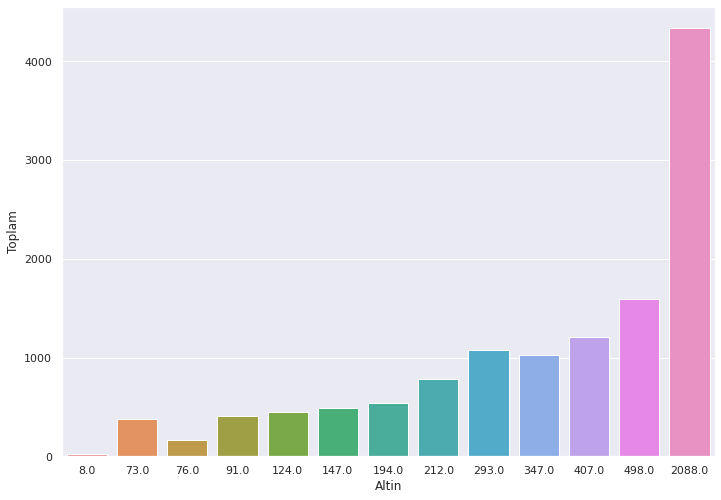

In [123]:
sns.barplot(data=df_filtered, 
            x="Altin",
            y="Toplam",
            )